In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sopt
import scipy.stats as stats
from scipy.stats import anderson

In [2]:
datos=pd.read_excel('Datos.xlsx')

In [3]:
datos=datos.dropna()

In [4]:
datos.head()

,Datos destilación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C","Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,375,26.6,Primera gota,376,29.6,Primera gota,379,28.4,Primera gota,375,30.8
4,5,460,43.5,5,458,45.8,5,459,44.3,5,465,47.4
5,10,529.7,50.2,10,529.4,52.6,10,530.4,51,10,536.4,52.3
6,15,599.5,55.7,15,599.1,58,15,601.8,56.8,15,607.8,58.3


In [5]:
datosCorrida1=pd.concat([datos['Datos destilación'],datos['Unnamed: 1'],datos['Unnamed: 2']],axis=1)
datosCorrida2=pd.concat([datos['Unnamed: 3'],datos['Unnamed: 4'],datos['Unnamed: 5']],axis=1)
datosCorrida3=pd.concat([datos['Unnamed: 6'],datos['Unnamed: 7'],datos['Unnamed: 8']],axis=1)
datosCorrida4=pd.concat([datos['Unnamed: 9'],datos['Unnamed: 10'],datos['Unnamed: 11']],axis=1)

In [6]:
datosCorrida2.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,376,29.6
4,5,458,45.8
5,10,529.4,52.6
6,15,599.1,58


In [7]:
datosCorrida1.columns=datosCorrida1.iloc[0]
datosCorrida2.columns=datosCorrida2.iloc[0]
datosCorrida3.columns=datosCorrida3.iloc[0]
datosCorrida4.columns=datosCorrida4.iloc[0]

In [8]:
datosCorrida1=datosCorrida1.drop(2,axis=0)
datosCorrida2=datosCorrida2.drop(2,axis=0)
datosCorrida3=datosCorrida3.drop(2,axis=0)
datosCorrida4=datosCorrida4.drop(2,axis=0)

In [9]:
datosCorrida1.head()

2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C"
3,Primera gota,375,26.6
4,5,460,43.5
5,10,529.7,50.2
6,15,599.5,55.7
7,20,674.5,61.4


In [10]:
datosCorrida1.index=[i for i in range(len(datosCorrida1))]
datosCorrida2.index=[i for i in range(len(datosCorrida2))]
datosCorrida3.index=[i for i in range(len(datosCorrida3))]
datosCorrida4.index=[i for i in range(len(datosCorrida4))]

In [11]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,Primera gota,376,29.6
1,5,458,45.8
2,10,529.4,52.6
3,15,599.1,58
4,20,676.1,63.6


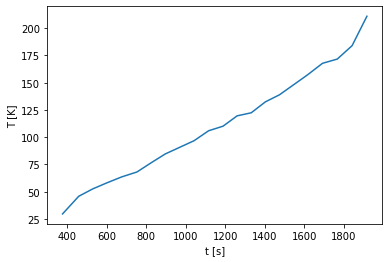

In [12]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Temperatura de destilación'])
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.show()

In [13]:
datosCorrida1['Volumen evaporado, %'][0]=0.1
datosCorrida2['Volumen evaporado, %'][0]=0.1
datosCorrida3['Volumen evaporado, %'][0]=0.1
datosCorrida4['Volumen evaporado, %'][0]=0.1

In [14]:
datosCorrida3.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,0.1,379,28.4
1,5,459,44.3
2,10,530.4,51
3,15,601.8,56.8
4,20,676.8,62.3


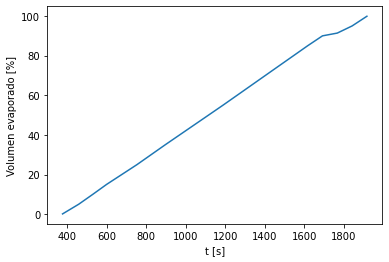

In [15]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('t [s]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

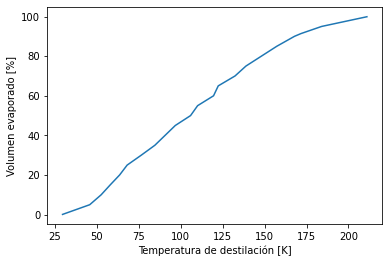

In [16]:
plt.plot(datosCorrida2['Temperatura de destilación'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('Temperatura de destilación [K]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

# Modelo empírico polinomial

Para la temperatura como función del tiempo, se observa que existe cierta linealidad; sin embargo, podría expandirse un polinomio de grado mayor, lo que permitiría aumentar el ajuste, de esta forma, se escoge un polinomio de ajuste de la forma:

$$T(t)=At^3+Bt^2+Ct+D$$

In [17]:
volumen,tiempo,temperatura=np.asarray(datosCorrida2['Volumen evaporado, %']).astype('float64'),np.asarray(datosCorrida2['tiempo']).astype('float64'),np.asarray(datosCorrida2['Temperatura de destilación']+273.15).astype('float64')

In [18]:
def TPolinomio(t,A,B,C,D):
    return A*t**3+B*t**2+C*t+D

In [19]:
coefsP,covP=sopt.curve_fit(TPolinomio,tiempo,temperatura)
ajusTPoli=TPolinomio(tiempo,coefsP[0],coefsP[1],coefsP[2],coefsP[3])
residuosEmpíricoPoli=temperatura-ajusTPoli

In [21]:
coefsP

array([ 3.75542223e-08, -1.09570116e-04,  1.91978498e-01,  2.46747689e+02])

In [22]:
se2P=(residuosEmpíricoPoli**2).sum()/(len(residuosEmpíricoPoli)-4)
np.sqrt(se2P)

3.3493617495824335

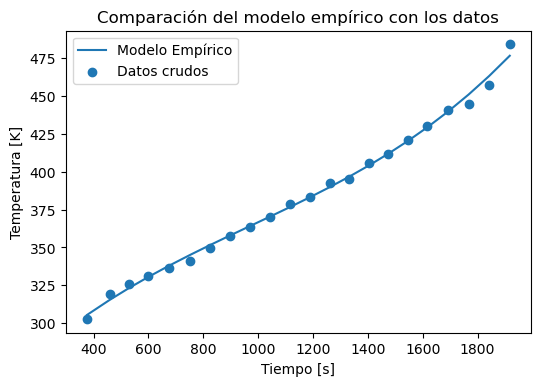

In [23]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusTPoli)
plt.scatter(tiempo,temperatura)
plt.title('Comparación del modelo empírico con los datos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.legend(['Modelo Empírico','Datos crudos'])
plt.savefig('ModeloEmpírico.png')
plt.show()

### Diagnósticos de los residuos para el modelo polinómico

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [24]:
anderson(residuosEmpíricoPoli).statistic,anderson(residuosEmpíricoPoli).critical_values[2]

(0.41777808179304543, 0.696)

#### Gráficas de residuos

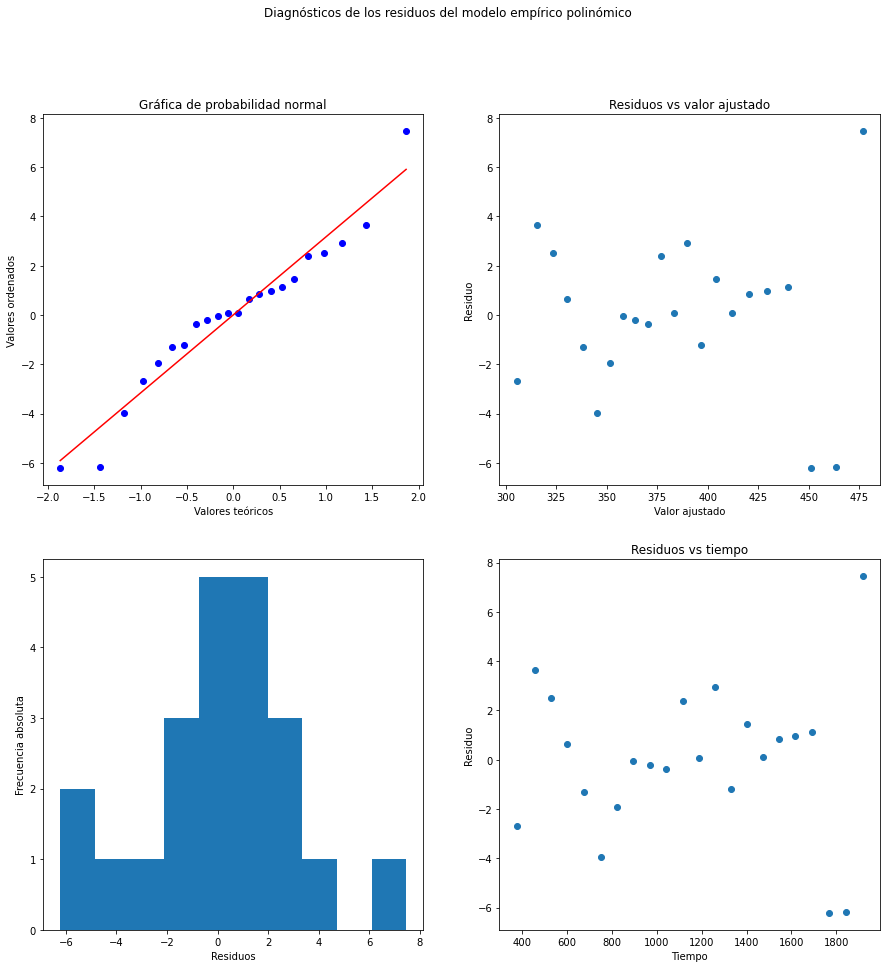

In [25]:
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
stats.probplot(residuosEmpíricoPoli,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPoli,residuosEmpíricoPoli)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPoli)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.scatter(tiempo,residuosEmpíricoPoli)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig1.suptitle('Diagnósticos de los residuos del modelo empírico polinómico')
plt.savefig('DiagnósticoEmpírico.png')
plt.show()

# Modelo teórico

## Balance de energía

Se define como volumen de control la muestra de hidrocarburos, se tiene entonces que:

$$V_{A}=F_{E}-F_{S}+V_{G}-V_{C}$$

* Velocidad de acumulación, $V_{A}=\frac{dM_{e}}{dt}$
* Flujo de entrada, $F_{E}=\dot{Q}$
* Flujo de salida, $F_{S}=\dot{M}_{S}\Delta H$
* Velocidad de generación, $R_{P}=0$
* Velocidad de consumo, $R_{C}=0$

$$\frac{dM_{e}}{dt}=\dot{Q}-\dot{M}_{S}\Delta H$$
$$\Rightarrow\frac{dMC\left(T-T_{ref}\right)}{dt}=\dot{Q}-\dot{M}_{S}\Delta H$$
$$\Rightarrow C\frac{dM\left(T-T_{ref}\right)}{dt}=\dot{Q}-\dot{M}_{S}\Delta H$$
$$\Rightarrow C\left(\left(T-T_{ref}\right)\frac{dM}{dt}+\frac{dT}{dt}M\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

### Balance de masa total

$$\frac{dM}{dt}=-\dot{M}_{s}$$

Integrando:

$$M=C_{1}-\dot{M}_{S}t$$

Con $C_{1}=M_{0}=\rho_{L}V_{0}$ la masa inicial en el volumen de control.

Por otro lado $\dot{M}_{S}=\rho_{V}\dot{V}_{S}$

### Sustitución

$$\Rightarrow C\left(-\dot{M}_{S}\left(T-T_{ref}\right)+\frac{dT}{dt}\left(M_{0}-\dot{M}_{S}t\right)\right)=\dot{Q}-\dot{M}_{S}\Delta H$$

Tomando $T_{ref}=0\textrm{ K}=-273.15\textrm{ °C}$ para la temperatura de referencia de la capacidad calorífica:

$$\Rightarrow C\left(-\dot{M}_{S}\left(T-T_{ref}\right)+\frac{dT}{dt}\left(M_{0}-\dot{M}_{S}t\right)\right)=\dot{Q}-\dot{M}_{S}\Delta H$$

Simplificando:

$$\frac{dT}{dt}-\frac{\dot{M}_{S}}{M_{0}-\dot{M}_{S}t}T=\frac{\dot{Q}-\dot{M}_{S}\Delta H}{C\left(M_{0}-\dot{M}_{S}t\right)}-\frac{\dot{M}_{S}}{M_{0}-\dot{M}_{S}t}T_{ref}$$

Tomando $\Delta H(t)=a+bt$:

$$\frac{dT}{dt}-\frac{\dot{M}_{S}}{M_{0}-\dot{V}_{S}t}T=\frac{\dot{Q}-\dot{M}_{S}a-\dot{M}_{S}bt}{C\left(M_{0}-\dot{M}_{S}t\right)}-\frac{\dot{M}_{S}}{M_{0}-\dot{M}_{S}t}T_{ref}$$

Ahora se debe buscar la solución de esta expresión, para esto, se toma el factor integrante:

$$F_{I}(t)=\exp{\left(\int_{0}^{t}-\frac{\dot{M}_{S}}{M_{0}-\dot{M}_{S}t'}dt'\right)}=M_{0}-\dot{M}_{S}t$$

Multilicando a ambos lados la ecuación por el factor integrante:

$$\left(M_{0}-\dot{M}_{S}t\right)\frac{dT}{dt}-\dot{M}_{S}T=\frac{\dot{Q}-\dot{M}_{S}a-\dot{M}_{S}bt}{C}-\dot{M}_{S}T_{ref}$$

Esto se puede simplificar de la forma:

$$\frac{d}{dt}\left(\left(M_{0}-\dot{M}_{S}t\right)T\right)=\frac{\dot{Q}-\dot{M}_{S}a-\dot{M}_{S}bt}{C}-\dot{M}_{S}T_{ref}$$

Integrando:

$$\left(M_{0}-\dot{M}_{S}t\right)T=\frac{\left(2\dot{Q}-2\dot{M}_{S}a\right)t-\dot{M}_{S}bt^2}{2C}-\dot{M}_{S}T_{ref}t+C_{2}$$
$$\Rightarrow T=\frac{\left(2\dot{Q}-2\dot{M}_{S}a\right)t-\dot{M}_{S}bt^2}{2C\left(M_{0}-\dot{M}_{S}t\right)}+\frac{C_{2}-\dot{M}_{S}T_{ref}t}{\left(M_{0}-\dot{M}_{S}t\right)}$$

En $t=t_{i}$, $T=T_{i}$, entonces:

$$T_{i}=\frac{2\left(\dot{Q}-\dot{M}_{S}a\right)t_{i}-\dot{M}_{S}bt_{i}^2}{2CM_{0}-2 C\dot{M}_{S}t_{i}}+\frac{C_{2}-\dot{M}_{S}T_{ref}t_{i}}{\left(M_{0}-\dot{M}_{S}t_{i}\right)}$$
$$\Rightarrow T_{i}\left(M_{0}-\dot{M}_{S}t_{i}\right)-\frac{2\left(\dot{Q}-\dot{M}_{S}a\right)t_{i}-\dot{M}_{S}bt_{i}^2}{2C}+\dot{M}_{S}T_{ref}t_{i}=C_{2}$$
$$C_{2}=\frac{2CT_{i}\left(M_{0}-\dot{M}_{S}t_{i}\right)-2\left(\dot{Q}-\dot{M}_{S}a\right)t_{i}+\dot{M}_{S}bt_{i}^2+2C\dot{M}_{S}T_{ref}t_{i}}{2C}$$

Sustituyendo:

Si se trabaja en Celsius:
$$T=\frac{2\left(\dot{Q}-\dot{M}_{S}a\right)t-\dot{M}_{S}bt^2}{2C\left(M_{0}-\dot{M}_{S}t\right)}+\frac{2CT_{i}\left(M_{0}-\dot{M}_{S}t_{i}\right)-2\left(\dot{Q}-\dot{M}_{S}a\right)t_{i}+\dot{M}_{S}bt_{i}^2+2C\dot{M}_{S}T_{ref}t_{i}-2C\dot{M}_{S}T_{ref}t}{2C\left(M_{0}-\dot{M}_{S}t\right)}$$

Pero en Kelvin:
$$T=\frac{2\left(\dot{Q}-\dot{M}_{S}a\right)t-\dot{M}_{S}bt^2}{2C\left(M_{0}-\dot{M}_{S}t\right)}+\frac{2CT_{i}\left(M_{0}-\dot{M}_{S}t_{i}\right)-2\left(\dot{Q}-\dot{M}_{S}a\right)t_{i}+\dot{M}_{S}bt_{i}^2}{2C\left(M_{0}-\dot{M}_{S}t\right)}$$

$$T=\frac{\alpha t-\beta t^2+\gamma}{\left(M_{0}-\dot{M}_{S}t\right)}$$

In [26]:
def Teórico(t,alpha,beta,gamma,M0,Ms):
    return (alpha*t-beta*t**2+gamma)/(M0-Ms*t)

In [30]:
coefsT,covT=sopt.curve_fit(Teórico,tiempo,temperatura)
ajusT=Teórico(tiempo,coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4])
residuosTeórico=temperatura-ajusT

In [31]:
coefsT

array([ 1.64996382e+03, -1.77328215e+00, -1.02491714e+07, -3.75993309e+04,
       -1.89996118e+01])

In [33]:
se2T=(residuosTeórico**2).sum()/(len(residuosTeórico)-5)
np.sqrt(se2T)

2.5155411020176692

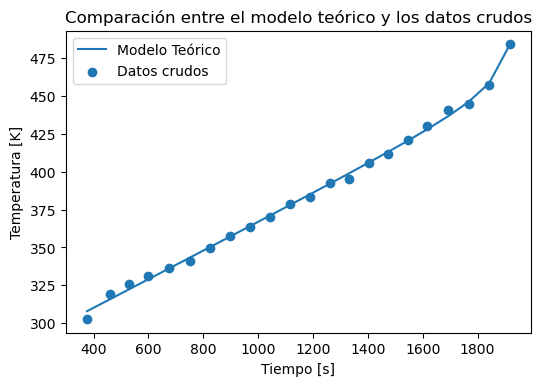

In [34]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusT)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Teórico','Datos crudos'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.savefig('ModeloTeórico.png')
plt.show()

In [35]:
anderson(residuosTeórico,dist='norm').statistic,anderson(residuosTeórico,dist='norm').critical_values

(0.20604843235782866, array([0.51 , 0.58 , 0.696, 0.812, 0.966]))

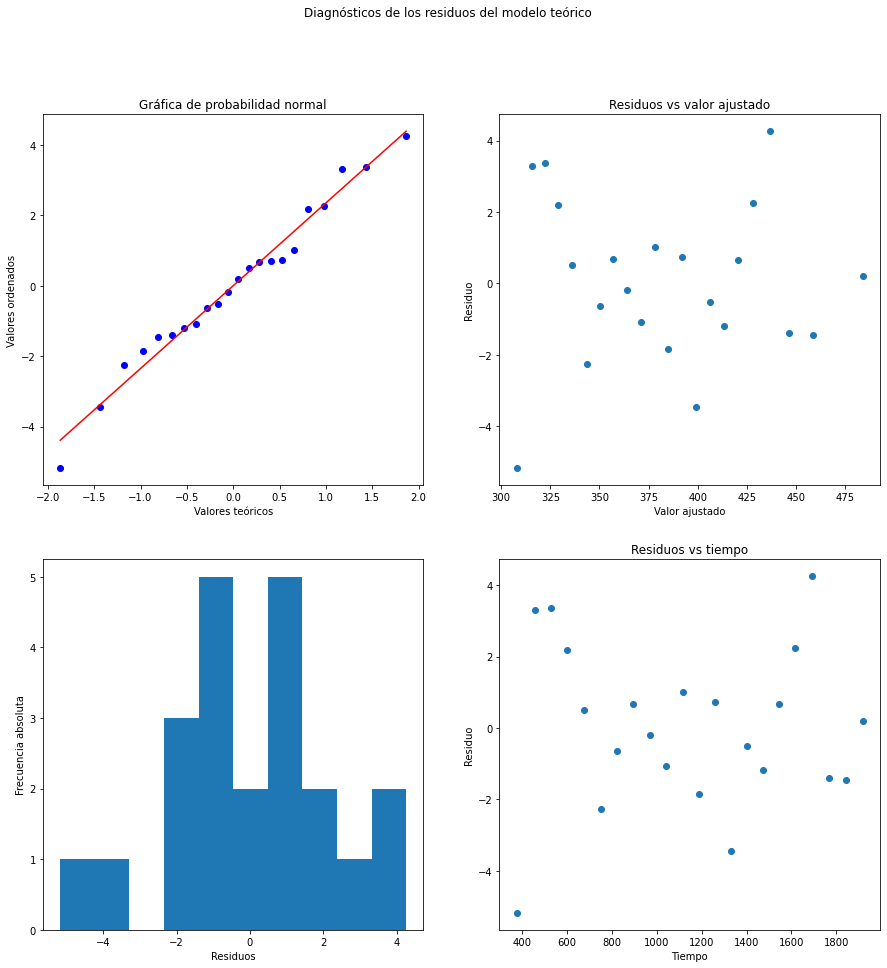

In [36]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.scatter(tiempo,residuosTeórico)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico')
plt.savefig('DiagnósticoTeórico.png')
plt.show()

# Comparación de los modelos

El estadístico $F$ a $16$ grados de libertad para numerador y $18$ para el denominador denominador tiene un valor teórico de $2.25$ al $95\%$ y un valor de $3.190$ al $99\%$, comparando con el calculado, se determina que las varianzas de los residuos para ambos modelos son distintas.

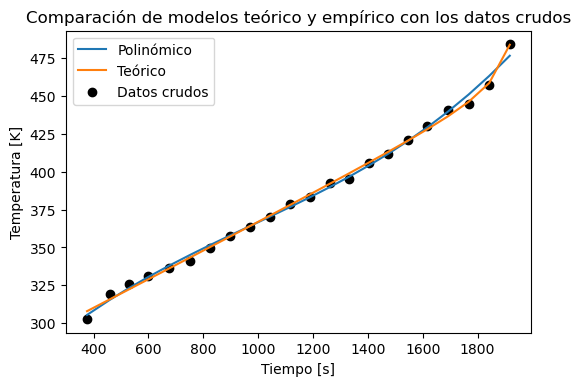

In [37]:
plt.figure(dpi=100)
plt.scatter(tiempo,temperatura,color='black')
plt.plot(tiempo,ajusTPoli)
plt.plot(tiempo,ajusT)
plt.legend(['Polinómico','Teórico','Datos crudos'])
plt.title('Comparación de modelos teórico y empírico con los datos crudos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.savefig('AmbosModelos.png')
plt.show()

## Desviaciones de la estima

In [38]:
F_calc=se2P/se2T
F_calc

1.7728062617861313

In [39]:
1-stats.f.cdf(F_calc,22-4,22-5)

0.12208143982554465

Se puede concluir que los modelos son estadísticamente iguales al $95\%$ y $99\%$ de confianza.

## Comparación de la varianza de los residuos con una arbitraria

### Para el teórico

A $17$ grados de libertad el $\chi^2$ teórico tiene un valor de $26.296$, para un $95\%$ de confianza, como se obtiene un número menor a este, se puede rechazar la hipótesis nula de que la varianza de los residuos es igual a la varianza $\sigma_{0}^{2}=(5)^2$, al $95\%$ de confianza.

Al $99\%$ de confianza, el valor de $\chi^2$ es $32.000$, de forma que se puede afirmar que las varianzas de los residuos de los modelos es distinta al $99\%$ de confianza.

### Para el empírico

A $18$ grados de libertad el $\chi^2$ teórico tiene un valor de $28.869$, para un $95\%$ de confianza, como se obtiene un número menor a este, se puede aceptar la hipótesis nula de que la varianza de los residuos es distinta a la varianza $\sigma_{0}^{2}=(5)^2$, al $95\%$ de confianza.

Al $99\%$ de confianza, el valor de $\chi^2$ es $34.805$, de forma que se puede afirmar que las varianzas de los residuos de los modelos es distinta al $99\%$ de confianza.

In [41]:
(22-5),(22-4)

(17, 18)

# Ajustando para todas las corridas experimentales



In [42]:
tiempo1,temp1=np.asarray(datosCorrida1['tiempo, s']).astype('float64'),np.asarray(datosCorrida1['Temperatura de destilación, °C']+273.15).astype('float64')
tiempo2,temp2=tiempo.copy(),temperatura.copy()
tiempo3,temp3=np.asarray(datosCorrida3['tiempo']).astype('float64'),np.asarray(datosCorrida3['Temperatura de destilación']+273.15).astype('float64')
tiempo4,temp4=np.asarray(datosCorrida4['tiempo']).astype('float64'),np.asarray(datosCorrida4['Temperatura de destilación']+273.15).astype('float64')

In [51]:
tiempo_avg=np.zeros_like(tiempo)
for i in range(len(tiempo)):
    tiempo_avg[i]=np.mean(np.array([tiempo1[i],tiempo2[i],tiempo4[i]]))

In [52]:
def DesviaciónRéplica(tiempo_avg,T):
    sum=0
    T=np.concatenate((T[0].reshape(len(T[0]),1),T[1].reshape(len(T[0]),1),T[2].reshape(len(T[0]),1)),axis=1)
    for i in range(len(tiempo_avg)):
        sum+=np.sum((T[i,:]-T[i,:].mean())**2)
    return sum/(len(tiempo_avg)*(len(T[1,:])-1))

In [63]:
sd2=DesviaciónRéplica(tiempo_avg,[temp1,temp2,temp4])

In [54]:
volumen1=np.asarray(datosCorrida1['Volumen evaporado, %']).astype('float64')
volumen2=volumen.copy()
volumen3=np.asarray(datosCorrida3['Volumen evaporado, %']).astype('float64')
volumen4=np.asarray(datosCorrida4['Volumen evaporado, %']).astype('float64')

In [55]:
tiempo=np.concatenate((tiempo_avg,tiempo_avg,tiempo_avg))
temperatura=np.concatenate((temp1,temp2,temp4))
volumen=np.concatenate((volumen1,volumen2,volumen4))
corridas=[[volumen[i],tiempo[i],temperatura[i]]for i in range(len(tiempo))]
corridas.sort(key = lambda x:x[1])

In [56]:
corridas=np.array(corridas)

In [57]:
corrida_avg=[]
for i in range(int(len(corridas)/4)):
    j=i*3
    k=j+3
    corrida_avg.append([corridas[j:k,0].mean(),corridas[j:k,1].mean(),corridas[j:k,2].mean()])
corrida_avg=np.array(corrida_avg)

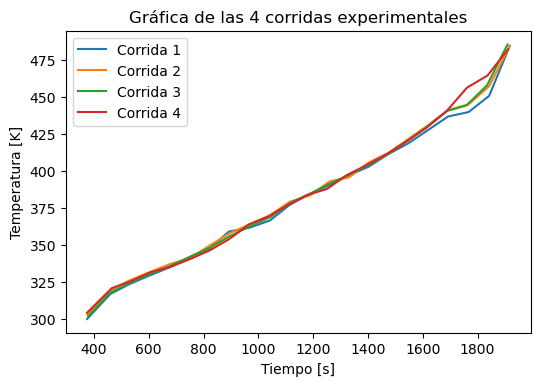

In [58]:
plt.figure(dpi=100)
plt.plot(tiempo1,temp1)
plt.plot(tiempo2,temp2)
plt.plot(tiempo3,temp3)
plt.plot(tiempo4,temp4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.legend(['Corrida 1','Corrida 2','Corrida 3','Corrida 4'])
plt.title('Gráfica de las 4 corridas experimentales')
plt.savefig('CorridasJuntas.png')
plt.show()

## Modelo teórico

In [59]:
#coefsT,_=sopt.curve_fit(Teórico,corridas[:,1],corridas[:,2])
ajusT=Teórico(corridas[:,1],coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4])
residuosTeórico=ajusT-corridas[:,2]

In [60]:
coefsT

array([ 1.64996382e+03, -1.77328215e+00, -1.02491714e+07, -3.75993309e+04,
       -1.89996118e+01])

In [61]:
se2T=(residuosTeórico**2).sum()/(len(residuosTeórico)-1)
np.sqrt(se2T)

3.0700084183979017

In [64]:
F_corridas=se2T/sd2
F_corridas

1.2151250419523423

In [65]:
1-stats.f.cdf(F_corridas,3*22-3,3*22-5)

0.2231615146367456

In [66]:
sm2T=abs(se2T-sd2)
np.sqrt(sm2T)

1.2917383839889367

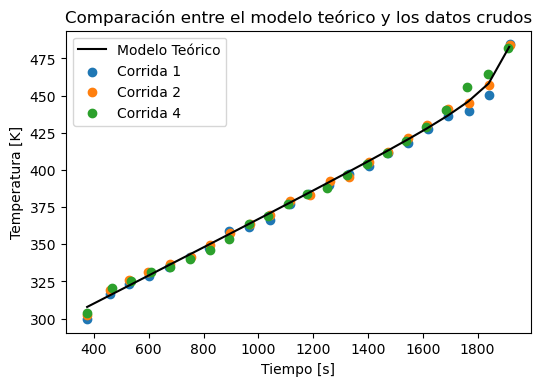

In [67]:
plt.figure(dpi=100)
plt.plot(corridas[:,1],ajusT,color='black')
plt.scatter(tiempo1,temp1)
plt.scatter(tiempo2,temp2)
#plt.scatter(tiempo3,temp3)
plt.scatter(tiempo4,temp4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.legend(['Modelo Teórico','Corrida 1','Corrida 2','Corrida 4'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.savefig('ModeloTeóricovsCorridas.png')
plt.show()

In [68]:
anderson(residuosTeórico,dist='norm').statistic,anderson(residuosTeórico,dist='norm').critical_values

(0.7220103723052915, array([0.546, 0.622, 0.746, 0.87 , 1.035]))

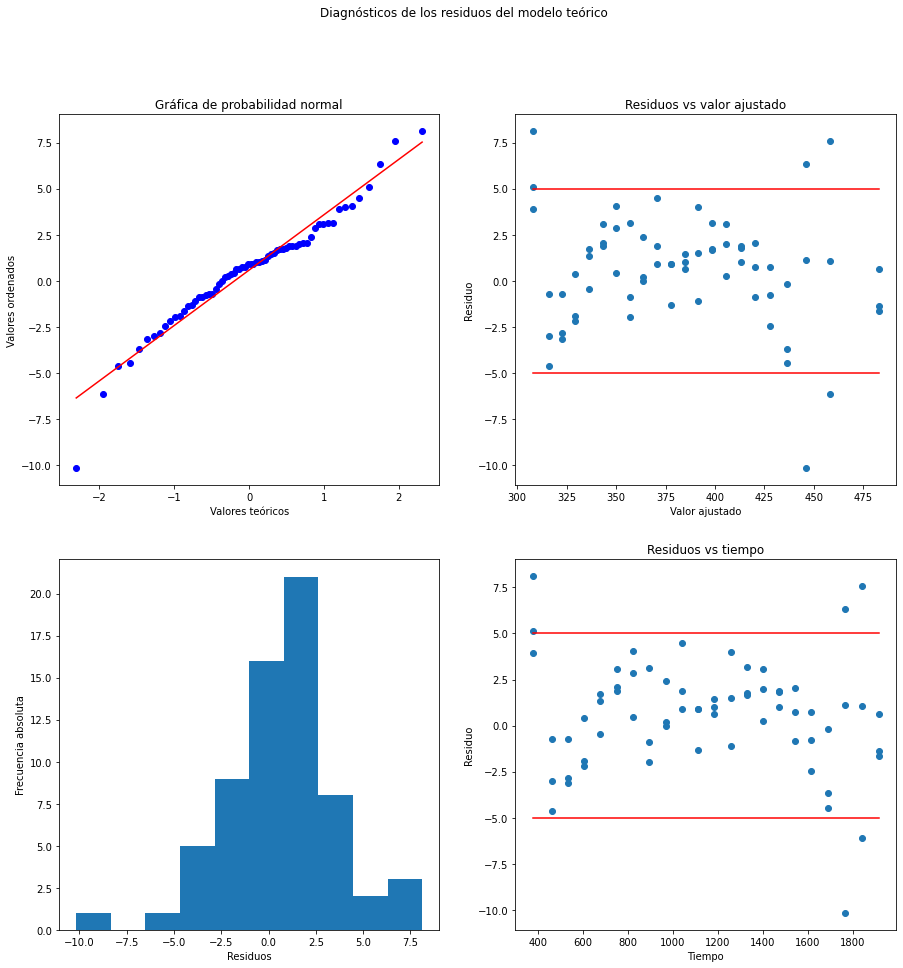

In [69]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.plot(ajusT,np.zeros_like(ajusT)+5,color='red')
ax2.plot(ajusT,np.zeros_like(ajusT)-5,color='red')
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.scatter(corridas[:,1],residuosTeórico)
ax4.plot(corridas[:,1],np.zeros_like(corridas[:,1])+5,color='red')
ax4.plot(corridas[:,1],np.zeros_like(corridas[:,1])-5,color='red')
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico')
plt.savefig('DiagnósticoTeóricoCorridas.png')
plt.show()

In [70]:
se2T*(22*3-5)/5**2

22.996882121242926

# Propuesta de depuración de datos de datos

Se propone eliminar los datos que producen residuos grandes, para determinar cuáles pueden ser residuos grandes, se observa que la mayoría de los residuos están entre $-5$ y $5$, por lo que se propone eliminar los residuos cuyo valor absoluto sea mayor a $5$, estos serían un total de $36$ datos.

In [71]:
depurando=corridas[np.where(np.abs(residuosTeórico)>5)]
depurado=corridas.copy()

In [72]:
depurado=depurado.tolist()
depurando=depurando.tolist()

In [73]:
len(depurando)

6

In [76]:
i=0
p=0

while i in range(len(depurado)):
    if depurado[i].tolist() in depurando:
        depurado=np.delete(depurado,i,axis=0)
        i=0
    else:
        i+=1

In [77]:
len(depurado)

60

In [78]:
# coefsT,_=sopt.curve_fit(Teórico,depurado[:,1],depurado[:,2])
ajusT=Teórico(depurado[:,1],coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4])
residuosTeórico=depurado[:,2]-ajusT
coefsT

array([ 1.64996382e+03, -1.77328215e+00, -1.02491714e+07, -3.75993309e+04,
       -1.89996118e+01])

In [79]:
se2T2=(residuosTeórico**2).sum()/(len(residuosTeórico)-1)
np.sqrt(se2T2)

2.1872591593489568

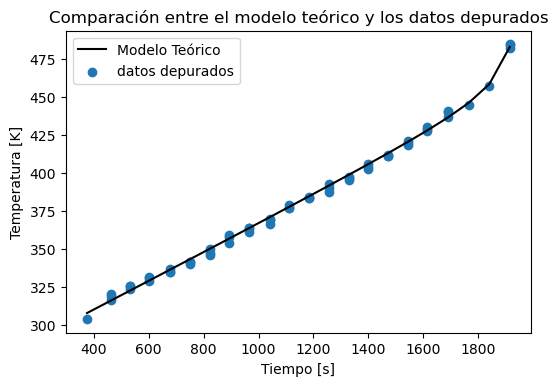

In [80]:
plt.figure(dpi=100)
plt.plot(depurado[:,1],ajusT,color='black')
plt.scatter(depurado[:,1],depurado[:,2])
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.legend(['Modelo Teórico','datos depurados'])
plt.title('Comparación entre el modelo teórico y los datos depurados')
plt.savefig('ModeloTeóricovsCorridasDepurado.png')
plt.show()

In [81]:
anderson(residuosTeórico,dist='norm').statistic,anderson(residuosTeórico,dist='norm').critical_values

(0.4657771389032277, array([0.544, 0.619, 0.743, 0.866, 1.03 ]))

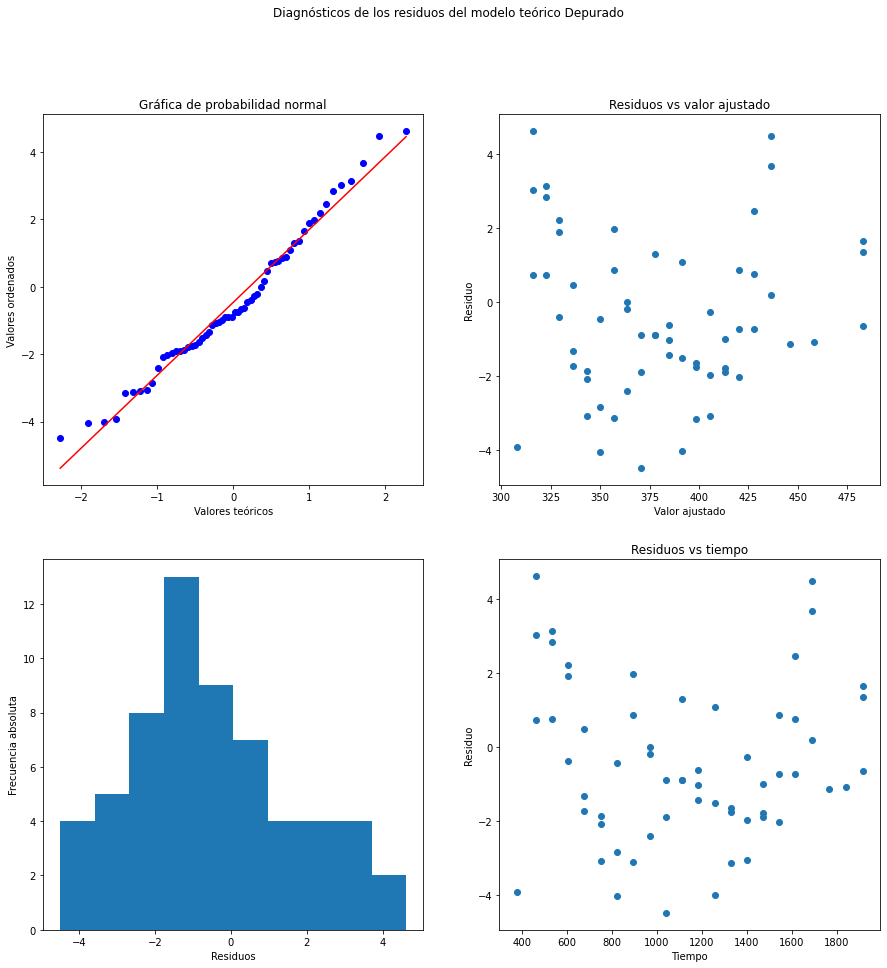

In [82]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.scatter(depurado[:,1],residuosTeórico)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico Depurado')
plt.savefig('DiagnósticoTeóricoCorridasDepurado.png')
plt.show()

In [83]:
(3*len(depurado)/3-5)

55.0

In [84]:
residuosTeórico.std()

2.1187209540242007

In [85]:
residuosTeórico.std()**2*(3*len(depurado)/3-5)/5**2

9.87575265824668

In [86]:
F_new=sd2/se2T2
F_new

1.6212786881854306

In [87]:
1-stats.f.cdf(F_new,63,55)

0.03444005245104953